In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# -------------------------------
       1. Load Dataset
# -------------------------------
df = pd.read_csv(r"C:\Users\Thanu\Downloads\Bank_Loan_Data.csv") 

print("Initial Data Shape:", df.shape)
print("Columns:", df.columns)

Initial Data Shape: (38576, 24)
Columns: Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')


In [11]:
# -------------------------------
       #2. Data Cleaning
# -------------------------------
# Remove duplicates
df = df.drop_duplicates()

# Handle missing values
df = df.fillna({
    'int_rate': df['int_rate'].mean(),
    'loan_amnt': df['loan_amount'].median()
})

In [17]:
# -------------------------------
    # 3. Feature Transformation
# -------------------------------
# Add a column for loan status (Good / Bad Loan)
df['loan_status_clean'] = df['loan_status'].apply(
    lambda x: 'Good Loan' if x in ['Fully Paid', 'Current'] else 'Bad Loan'
)
df['issue_date'] = pd.to_datetime(df['issue_date'], errors='coerce')

# Extract year & month for time-series analysis
df['year'] = df['issue_date'].dt.year
df['month'] = df['issue_date'].dt.month

In [20]:
# --------------------------------------------
    # 4. Exploratory Data Analysis (EDA)
# --------------------------------------------

print("Total Loan Amount Issued:", df['loan_amount'].sum())
print("Total Payment Received:", df['total_payment'].sum())
 


Total Loan Amount Issued: 435757075
Total Payment Received: 473070933


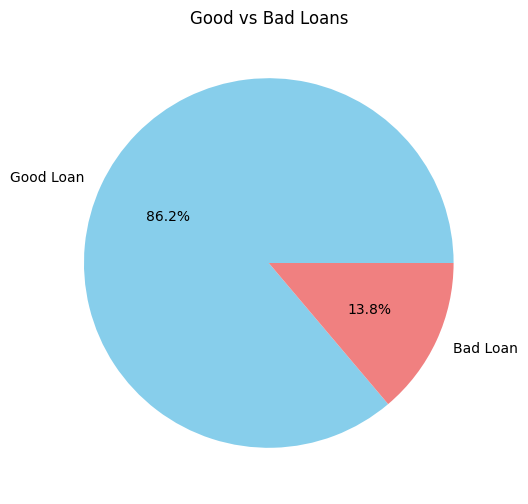

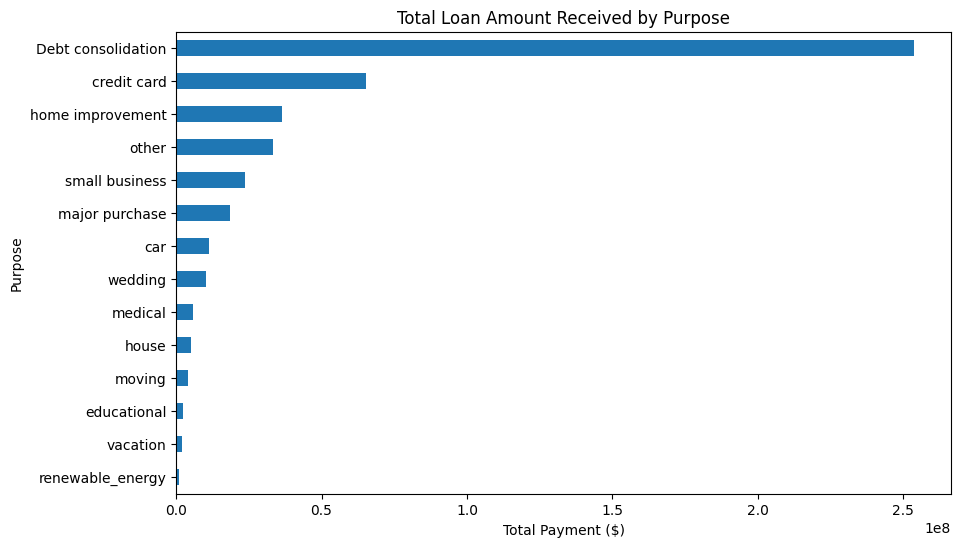

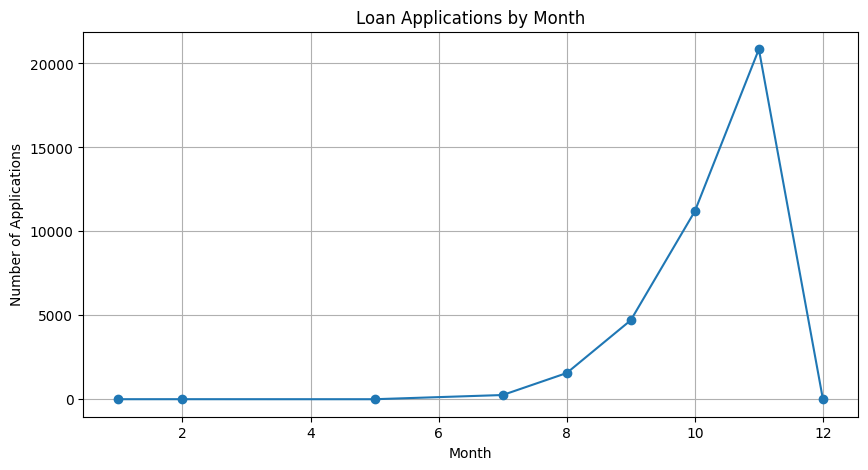

In [22]:

# -------------------------------
      # 5. Visualization
# -------------------------------

# Loan status distribution (Pie chart)
plt.figure(figsize=(6,6))
status_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue','lightcoral'])
plt.title("Good vs Bad Loans")
plt.ylabel("")
plt.show()

# Loan amount received by purpose (Bar chart)
plt.figure(figsize=(10,6))
df.groupby('purpose')['total_payment'].sum().sort_values().plot(kind='barh')
plt.title("Total Loan Amount Received by Purpose")
plt.xlabel("Total Payment ($)")
plt.ylabel("Purpose")
plt.show()

# Trend of loan applications by month
plt.figure(figsize=(10,5))
df.groupby('month')['loan_amount'].count().plot(kind='line', marker='o')
plt.title("Loan Applications by Month")
plt.xlabel("Month")
plt.ylabel("Number of Applications")
plt.grid(True)
plt.show()